In [20]:
adult 테스트셋 분류 정확도 95%의 모델을 찾으세요
-수입을 예측하는데 가장 중요한 특징은 무엇입니까?
-인구조사 대상의 연간수입이 5천만원 이상/이하를 분류하는 문제
-training 데이터셋으로 모델을 학습시켜야 함

SyntaxError: invalid syntax (<ipython-input-20-766ee1284ec7>, line 1)

In [ ]:
1) KNN

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import export_graphviz
import graphviz 
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

In [123]:
#테스트 데이터의 첫줄 지움
adult2 = pd.read_csv('adult.data', header = None)
adult3 = pd.read_csv('adult.test', skiprows=1, header = None)

In [124]:
adult2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [125]:
adult3.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [126]:
adult1 =pd.concat((adult2, adult3), axis = 0)
adult1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [127]:
adult = adult1.dropna()

In [128]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
0     48842 non-null int64
1     48842 non-null object
2     48842 non-null int64
3     48842 non-null object
4     48842 non-null int64
5     48842 non-null object
6     48842 non-null object
7     48842 non-null object
8     48842 non-null object
9     48842 non-null object
10    48842 non-null int64
11    48842 non-null int64
12    48842 non-null int64
13    48842 non-null object
14    48842 non-null object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [129]:
adult = adult.replace('<=50K.', '<=50K', regex = True)
adult = adult.replace('>50K.', '>50K', regex = True)

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
df = pd.get_dummies(adult) #문자값을 숫자로 표현
df.columns

Index([                    0,                     2,                     4,
                          10,                    11,                    12,
                      '1_ ?',      '1_ Federal-gov',        '1_ Local-gov',
           '1_ Never-worked',
       ...
              '13_ Scotland',           '13_ South',          '13_ Taiwan',
              '13_ Thailand', '13_ Trinadad&Tobago',   '13_ United-States',
               '13_ Vietnam',      '13_ Yugoslavia',           '14_ <=50K',
                  '14_ >50K'],
      dtype='object', length=110)

In [132]:
x = df.iloc[:, :-2]
y = df.iloc[:, -2:]

In [133]:
x.shape, y.shape

((48842, 108), (48842, 2))

In [134]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
X_train.shape, X_test.shape

((36631, 108), (12211, 108))

In [135]:
from sklearn.neighbors import KNeighborsClassifier

In [136]:
knn = KNeighborsClassifier() #K개수는 보통 5 혹은 빈칸
knn.fit(X_train, y_train)#핏팅시키기

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [137]:

knn.predict(X_test)

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [138]:

knn.score(X_train, y_train), knn.score(X_test, y_test)

(0.8354399279298954, 0.7793792482188191)

In [ ]:
2) Linear Regression

In [73]:
from sklearn.linear_model import LinearRegression

In [179]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
#min max 정규화 [0,1]
minimum = np.min(df, axis=0)
maximum = np.max(df, axis=0)
df_norm = (df - minimum) / (maximum-minimum)

In [180]:
x = df_norm.iloc[:, :-2]
y = df_norm.iloc[:, -2:]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
X_train.shape, X_test.shape
lr = Ridge(alpha=1.0).fit(X_train, y_train) #분류기 때문에 Ridge 사용.

In [181]:
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.37102681697679846, 0.35450924382640814)

In [ ]:
3) 결정트리

In [182]:
x = df.iloc[:, :-2]
y = df.iloc[:, -2:]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
X_train.shape, X_test.shape

((36631, 108), (12211, 108))

In [183]:
from sklearn.linear_model import LinearRegression, LogisticRegression #예측용, 분류용
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor 

from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.model_selection import train_test_split

In [184]:
tree = DecisionTreeClassifier(max_depth =12, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=12,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [185]:
tree.score(X_train, y_train), tree.score(X_test, y_test)

(0.8771259315879992, 0.856932274179019)

In [186]:
df.columns

Index([                    0,                     2,                     4,
                          10,                    11,                    12,
                      '1_ ?',      '1_ Federal-gov',        '1_ Local-gov',
           '1_ Never-worked',
       ...
              '13_ Scotland',           '13_ South',          '13_ Taiwan',
              '13_ Thailand', '13_ Trinadad&Tobago',   '13_ United-States',
               '13_ Vietnam',      '13_ Yugoslavia',           '14_ <=50K',
                  '14_ >50K'],
      dtype='object', length=110)

In [171]:

#108 트리그림그리기
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot', impurity=False, filled=True)

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

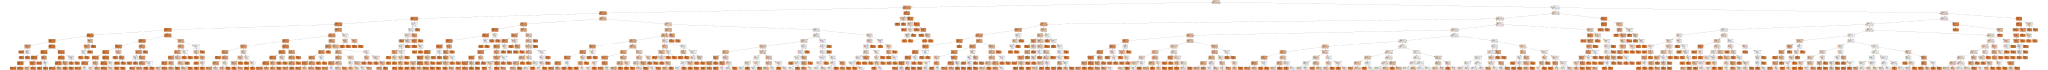

In [172]:

import graphviz #anaconda prompt /pip install graphviz
with open('tree.dot') as f:
    dot_graph = f.read()
g = graphviz.Source(dot_graph)
display(g)

In [ ]:
4) Random Forest 

In [176]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 100).fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9998908028718845, 0.849479977069855)

In [ ]:
5) 신경망 네트워크

In [178]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes = (50,50)).fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.4703666293576479, 0.4629432478912456)